In [3]:
import torch
from torch import nn
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from matplotlib.pylab import *

#1241, 1000


In [4]:
%matplotlib inline
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='k')
rc('figure', facecolor='k', figsize=(6, 5))
rc('savefig', bbox='tight')

In [5]:
X = torch.randn(1000, 2)
H = torch.tanh(X)

In [6]:
x_min = -1
x_max = +1
colors = (X - x_min) / (x_max - x_min)
colors =  (colors * 511).short().numpy()
colors = np.clip(colors, 0, 511)

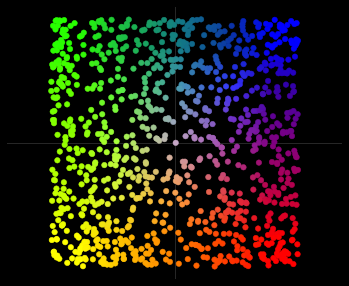

In [7]:
utils.show_scatterplot(H, colors)

In [8]:
#model = nn.Sequential(nn.Linear(2, 100), nn.Linear(100, 2))
#model = nn.Sequential(nn.Linear(2, 100), nn.ReLU(), nn.Linear(100, 2))
class Model(nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        self.H = H
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
    def forward(self, x, nb_relu_dim=-1):
        z = self.linear1(x)
        if nb_relu_dim == self.H or nb_relu_dim == -1:
            h = F.relu(z)
        elif nb_relu_dim == 0:
            h = z
        else:
            h = torch.cat(F.relu(z[:nb_relu_dim]), z[nb_relu_dim:])
        return self.linear2(h), h
#model = nn.Sequential(nn.Linear(2, 10), nn.ReLU(), nn.Linear(10, 2))

<Figure size 432x360 with 0 Axes>

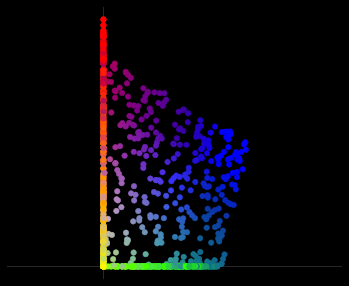

<Figure size 432x360 with 0 Axes>

In [10]:
#for seed in range(20):
torch.manual_seed(8)
model = Model(2, 2, 2)
with torch.no_grad():
    Y1, Z = model.forward(H, nb_relu_dim=-1)
utils.show_scatterplot(Z, colors)
plt.figure()

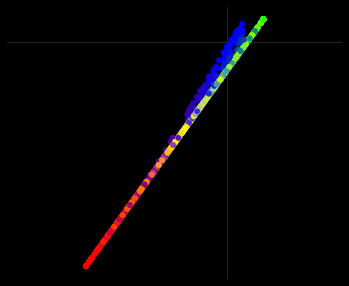

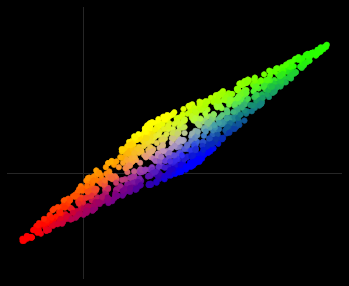

In [72]:
with torch.no_grad():
    Y1 = model.forward(H, nb_relu_dim=0)

utils.show_scatterplot(Y1, colors)

In [73]:
print(model.linear1.weight.data)
print(model.linear1.bias.data)


tensor([[ 0.1385,  0.4883],
        [ 0.6313, -0.2877]])
tensor([0.0195, 0.2041])


$w_1 = 0.3643$ first coefficient  
$w_2 = -0.3121$ second coefficient  
$b = -0.1371$ intercept  


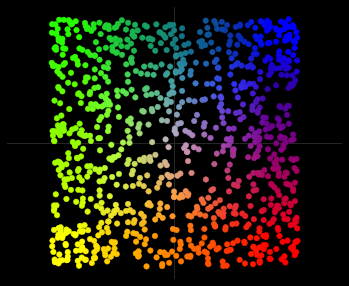

In [40]:
utils.show_scatterplot(H, colors)

In [81]:
print(model.linear1.weight.data)
b = model.linear1.bias.data
print(b)

tensor([[ 0.1385,  0.4883],
        [ 0.6313, -0.2877]])
tensor([0.0195, 0.2041])


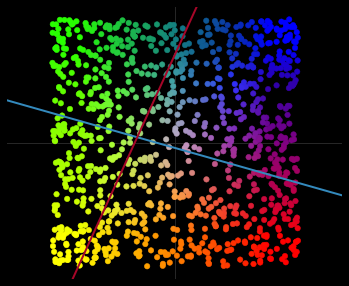

In [79]:
utils.show_scatterplot(H, colors)


for i in range(2):
    w1, w2 = model.linear1.weight.data[i]
    b = model.linear1.bias.data[i]
    xin = np.linspace(-1.5, 1.5)
    yout = (-1/w2) * (w1 * xin + b)
    plot(xin, yout, c=f'C{i}')

axis([-1.1, 1.1, -1.1, 1.1]);
